In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore")

In [2]:
social=pd.read_csv("social.csv")
social

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
social.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
social.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
social.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [7]:
social.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

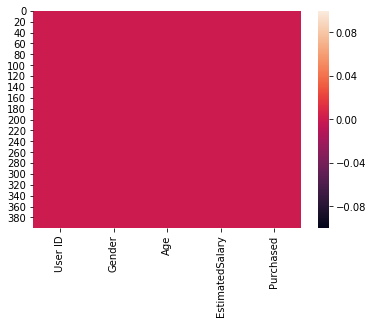

In [10]:
sns.heatmap(social.isnull())

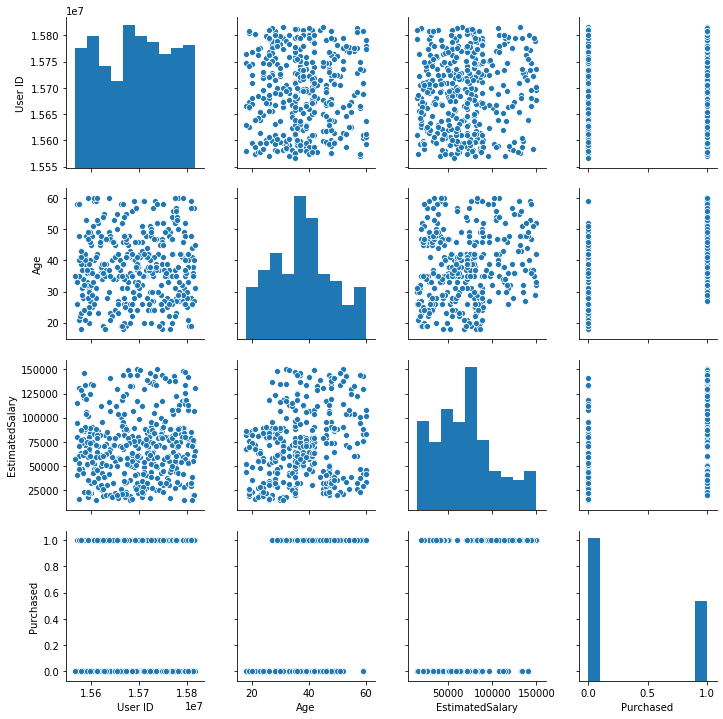

In [11]:
sns.pairplot(social)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023DE57FBCC0>,
      dtype=object)

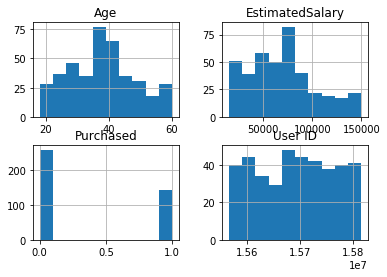

In [12]:
social.hist()

In [13]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023DE58957F0>,
      dtype=object)

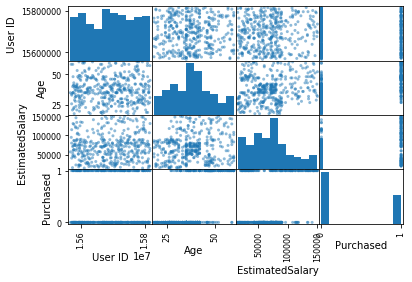

In [14]:
scatter_matrix(social)

In [28]:
x=social.drop("Gender",axis=1)
x

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
5,15728773,27,58000,0
6,15598044,27,84000,0
7,15694829,32,150000,1
8,15600575,25,33000,0
9,15727311,35,65000,0


In [29]:
y=social['Gender']
y

0        Male
1        Male
2      Female
3      Female
4        Male
5        Male
6      Female
7      Female
8        Male
9      Female
10     Female
11     Female
12       Male
13       Male
14       Male
15       Male
16       Male
17       Male
18       Male
19     Female
20       Male
21     Female
22       Male
23     Female
24       Male
25       Male
26       Male
27     Female
28       Male
29       Male
        ...  
370    Female
371      Male
372    Female
373      Male
374    Female
375    Female
376    Female
377    Female
378      Male
379    Female
380      Male
381      Male
382    Female
383      Male
384    Female
385      Male
386    Female
387      Male
388      Male
389    Female
390      Male
391      Male
392    Female
393      Male
394    Female
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=42)

In [31]:
x_train.shape

(316, 4)

In [32]:
y_train.shape

(316,)

In [33]:
x_test.shape

(84, 4)

In [34]:
y_test.shape

(84,)

# Applying Model and Algorithms using cross validation score

In [35]:
mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print("Score:",score)

print('Mean scores:',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(mnb,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.45679012 0.5125     0.5875     0.525      0.43037975]
Mean scores: 0.5024339740584466
Standard Deviation 0.054994457780744584
Y Prediction values
['Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male'
 'Male' 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Female'
 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male'
 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Male' 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Female'
 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Male' 'Female' 'Female' 'Male' 'Female' 'Male' 'Fe

array([[102, 102],
       [ 97,  99]], dtype=int64)

In [36]:
#scoring parameters for classification
#scoring=['accuracy','f1','f1_micro','f1_macro','roc_auc']
# scoring parameters for regression
#scoring=['r2','neg_mean_squarred_value','explained_variance']

sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')

print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(sv,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy Score= [0.50617284 0.5125     0.5125     0.5125     0.50632911]
Mean Scores 0.5100003906860447
Standard Deviation 0.00306178252868917
Y Prediction values
['Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Femal

0.51

In [37]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')

print('F1-Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

F1-Score= [0.53079268 0.44126984 0.49206349 0.56078431 0.50601251]
Mean Scores 0.5061845671996318
Standard Deviation 0.04000011922713123
Y Prediction values
['Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female'
 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female'
 'Male' 'Female' 'Female' 'Female' 'Female' 'Female' 'Male' 'Female'
 'Male' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male' 'Female' 'Male'
 'Male' 'Female' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Female' 'Male' 'Male' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Female'
 'Male' 'Male' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male' 'Female'
 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' '

0.52

In [38]:
lg=LogisticRegression()
score=cross_val_score(lg,x,y,cv=5,scoring='f1_macro')

print('F1-Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(lg,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

F1-Score= [0.51377559 0.53568627 0.54180985 0.4129979  0.40468174]
Mean Scores 0.481790271182056
Standard Deviation 0.06034617703771479
Y Prediction values
['Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male'
 'Male' 'Female' 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Female'
 'Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Female

0.5